In [22]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import norm
from IPython.display import Image
from IPython.display import display, Math, Latex
from sklearn.naive_bayes import GaussianNB
from sklearn.cross_validation import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score,recall_score
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.utils.multiclass import unique_labels

In [23]:
def label_encoding(dataset,input_headers):
    
    for i in input_headers:
        the_data_type=dataset[i].dtype.name
#         if (the_data_type=='object'):
        lable_enc=preprocessing.LabelEncoder()
        lable_enc.fit(dataset[i])
        labels=lable_enc.classes_   #this is an array
        labels=list(labels) #converting the labels array to a list
        print(labels)
        dataset[i]=lable_enc.transform(dataset[i])
#             print(dataset[i])


In [24]:
def feature_scaling(X_train,X_test):
    sc_X=StandardScaler()
    X_train=sc_X.fit_transform(X=X_train,y=None)
    X_test=sc_X.fit_transform(X=X_test,y=None)

    print(sc_X.fit(X_train))
    print(X_train[0:5])
    
    return X_train, X_test

In [25]:
location=r'C:\Users\Crystal\Desktop\Programs\dataset_repo\CDH_Train.csv'
df=pd.read_csv(location)
# df=pd.read_csv('thermostat_dataset.txt',delimiter='\t')

In [26]:
df


,Length,Width,model_target,Species
0,4.268,1.700,1,Dog
1,3.000,1.200,1,Dog
2,2.378,0.905,1,Dog
3,7.262,2.137,0,Horse
4,6.100,2.230,0,Horse
5,1.500,0.780,0,Cat
6,2.451,1.000,1,Dog
7,2.130,0.900,1,Dog
8,1.130,0.398,0,Cat
9,5.816,1.428,0,Horse


In [27]:
df.describe()

,Length,Width,model_target
count,299.000000,299.000000,299.000000
mean,4.322602,1.394833,0.234114
std,2.020140,0.654735,0.424153
min,1.051000,0.257000,0.000000
25%,2.582000,0.851500,0.000000
50%,4.207000,1.399000,0.000000
75%,6.090000,1.975000,0.000000
max,7.956000,2.494000,1.000000


In [28]:
df.model_target.unique()

array([1, 0], dtype=int64)

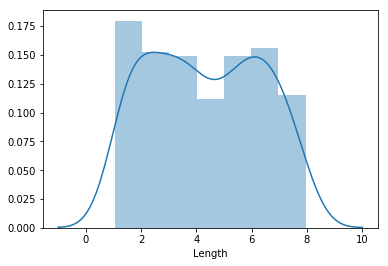

In [29]:
sns.distplot(df.Length)
plt.show()

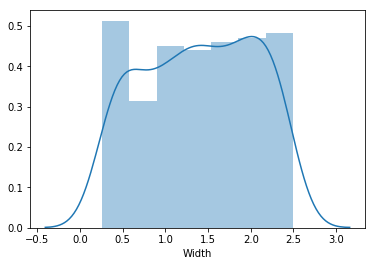

In [30]:
sns.distplot(df.Width)
plt.show()

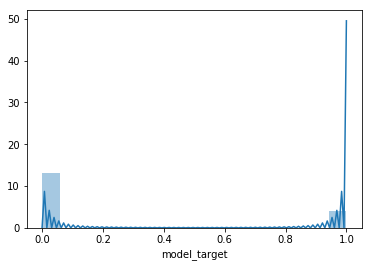

In [31]:
sns.distplot(df.model_target)
plt.show()

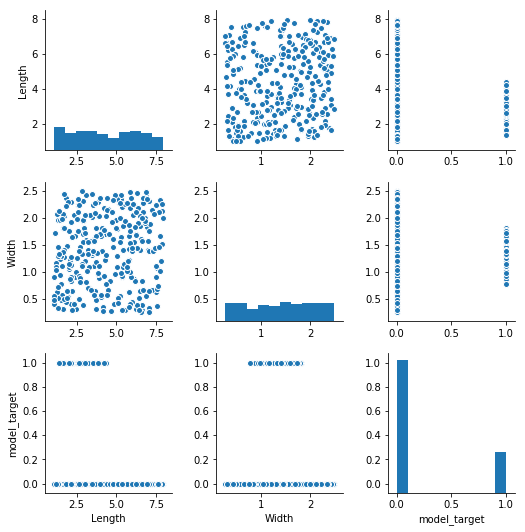

In [33]:
sns.pairplot(df)
plt.show()

In [34]:
X=df.drop(['model_target','Species'],axis=1)

In [35]:
X.head()

,Length,Width
0,4.268,1.700
1,3.000,1.200
2,2.378,0.905
3,7.262,2.137
4,6.100,2.230


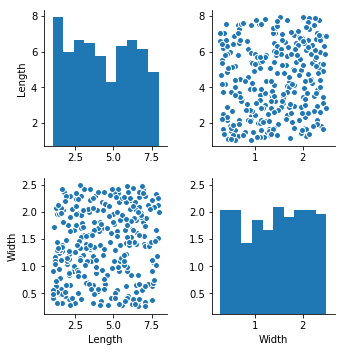

In [36]:
sns.pairplot(X)
plt.show()

In [37]:
y=df['Species']

In [38]:
y.head()

0      Dog
1      Dog
2      Dog
3    Horse
4    Horse
Name: Species, dtype: object

In [39]:
classes=list(y.unique())
classes

['Dog', 'Horse', 'Cat', 'Unknown']

In [41]:
label_encoding(df,['model_target'])

[0, 1]


In [42]:
Xtrain,Xtest,ytrain,ytest=train_test_split(X,y)

In [43]:
Xtrain

,Length,Width
257,5.896,0.408
108,4.434,2.151
56,7.049,1.381
246,7.475,1.445
260,2.673,2.239
245,1.065,0.417
173,1.729,1.809
134,7.501,2.229
146,6.475,1.402
117,2.607,1.976


In [44]:
Xtest

,Length,Width
208,3.423,0.674
197,3.203,1.554
58,1.312,0.575
67,2.821,1.150
275,5.288,0.987
80,7.858,1.194
40,2.898,1.549
270,7.717,1.465
120,3.866,0.960
287,5.706,1.097


In [45]:
#Scale the data    
Xtrain, Xtest=feature_scaling(Xtrain,Xtest)

StandardScaler(copy=True, with_mean=True, with_std=True)
[[ 0.76946547 -1.51518635]
 [ 0.04980045  1.16368227]
 [ 1.33702619 -0.01975366]
 [ 1.54672338  0.07860984]
 [-0.81704641  1.29893209]]


In [46]:
ytest

208    Unknown
197        Dog
58         Cat
67         Dog
275    Unknown
80     Unknown
40         Dog
270      Horse
120        Dog
287    Unknown
281        Dog
206        Dog
227      Horse
15       Horse
106    Unknown
103    Unknown
264        Dog
111    Unknown
110    Unknown
171    Unknown
203      Horse
112    Unknown
216    Unknown
2          Dog
62     Unknown
256      Horse
97     Unknown
250    Unknown
151    Unknown
223    Unknown
        ...   
154        Cat
14       Horse
184    Unknown
284    Unknown
24     Unknown
19         Dog
180    Unknown
214        Dog
90         Dog
86     Unknown
295      Horse
179    Unknown
26     Unknown
12       Horse
160        Cat
102        Dog
261    Unknown
181    Unknown
49       Horse
104    Unknown
46     Unknown
54     Unknown
66     Unknown
20         Dog
27         Dog
297    Unknown
237    Unknown
177    Unknown
186        Dog
41       Horse
Name: Species, Length: 75, dtype: object

In [47]:
model = GaussianNB()

In [48]:
model.fit(Xtrain,ytrain)

GaussianNB(priors=None)

In [49]:
y_model=model.predict(Xtest)
y_model

array(['Unknown', 'Dog', 'Cat', 'Dog', 'Unknown', 'Unknown', 'Dog',
       'Unknown', 'Unknown', 'Unknown', 'Unknown', 'Unknown', 'Horse',
       'Horse', 'Unknown', 'Unknown', 'Unknown', 'Unknown', 'Unknown',
       'Unknown', 'Horse', 'Unknown', 'Unknown', 'Dog', 'Unknown',
       'Horse', 'Unknown', 'Unknown', 'Unknown', 'Dog', 'Unknown',
       'Unknown', 'Dog', 'Unknown', 'Unknown', 'Horse', 'Dog', 'Unknown',
       'Horse', 'Unknown', 'Unknown', 'Unknown', 'Unknown', 'Dog',
       'Unknown', 'Cat', 'Horse', 'Unknown', 'Unknown', 'Unknown', 'Dog',
       'Unknown', 'Unknown', 'Dog', 'Unknown', 'Horse', 'Unknown',
       'Unknown', 'Horse', 'Cat', 'Dog', 'Dog', 'Unknown', 'Horse', 'Cat',
       'Unknown', 'Unknown', 'Unknown', 'Dog', 'Dog', 'Unknown',
       'Unknown', 'Unknown', 'Dog', 'Horse'], dtype='<U7')

In [50]:
accuracy_score(ytest,y_model)

0.88

In [51]:
# tn,fp,fn,tp=confusion_matrix(ytest, y_model)

In [52]:
cm=confusion_matrix(ytest, y_model)

In [53]:
cm

array([[ 3,  0,  0,  0],
       [ 0, 13,  0,  5],
       [ 0,  0, 11,  1],
       [ 1,  2,  0, 39]], dtype=int64)

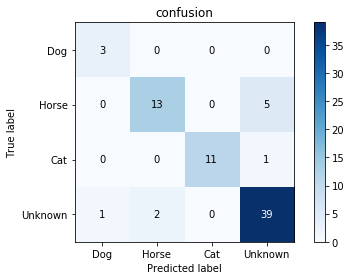

In [54]:
fig, ax = plt.subplots()
cmap=plt.cm.Blues
im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
ax.figure.colorbar(im, ax=ax)

ax.set(xticks=np.arange(cm.shape[1]),
       yticks=np.arange(cm.shape[0]),
       xticklabels=classes,
       yticklabels=classes,
       title="confusion",
       ylabel='True label',
       xlabel='Predicted label')



# Loop over data dimensions and create text annotations.
normalize=False
fmt = '.2f' if normalize else 'd'
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, format(cm[i, j], fmt),
                ha="center", va="center",
                color="white" if cm[i, j] > thresh else "black")
fig.tight_layout()



plt.show()